# Introduction

<b>The Meteorological Society</b> collects data from meteorites that have fallen from outer space. This dataset includes the type, year of discovery, mass, composition and other characteristics of more than 1000 years of meteorites that have landed on Earth.

The Meteorological Society is a non-profit scholarly organisation founded in 1933 focused on the studies of meteorites

The dataset was downloaded from the federal open data of the US Government. It contains 45000+ meteorites collected by <b>Javier de la Torre </b>. 


# Reading the Data

In [4]:
from matplotlib import pyplot as plt
import pandas
import geopandas
import seaborn as sns
import math

In [41]:
#plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 80

data = pandas.read_csv(r'C:\Users\badas\OneDrive\Documents\CSC148\Projects\Nasa\Meteorite_Landings.csv')

# Distribution of Valid and Relict Meteorites

We plot and compare the number of valid meteorites today to the number of relict meteorites in the form of a <b>bar graph</b>

<b>Relict Meteorite: </b> A highly altered object that may have a meteoritic origin. These are dominantly (>95%) composed of secondary minerals formed on the body on which the object was found.

<b>Valid Meteorite: </b> Meteorites that are found and confirmed to be meteorites

These definitions are obtained from The Meteorological Society database

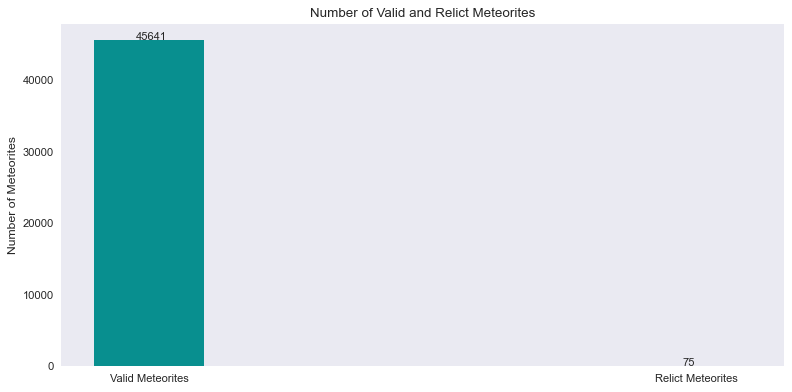

In [58]:
nametype_data = data[['nametype']] == 'Valid'

count_valid = int(nametype_data.sum())
count_relict = len(nametype_data) - count_valid

#print(count_valid, count_relict)

width = 0.2
x = ['Valid Meteorites', 'Relict Meteorites']
y = [count_valid, count_relict]
bars = plt.bar(x, y, width=width, color='#088F8F')

for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + 0.075, y_val, y_val)


plt.ylabel('Number of Meteorites')
plt.title("Number of Valid and Relict Meteorites")
plt.tight_layout()
plt.grid(False)
plt.show()

### Analysis
As we can see from this graph. The number of valid meteorites far outnumber the number of relict ones. This could be because the difficulty of identifying a relict meteorite. Relict meteorites have to be classified with more scrutiny than valid ones, and there is more ambiguity since they were not tracked when falling from outer space

# Distribution of Meteorites by Year

We plot and compare the number of meteorites fallen and found in the form of a <b> histogram </b> filtered from 1950 to 2020 since a majority of the meteorites were found after 1950.

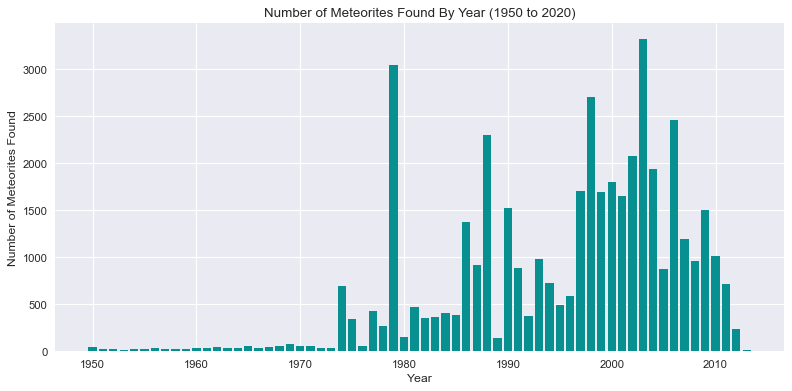

In [62]:
year_data = data['year']
# print(year_data)

year_list = data['year'].tolist()
remove_list_year = []
for i in range(len(year_list)):
    if math.isnan(year_list[i]):
        remove_list_year.append(i)
    else:
        year_list[i] = float(year_list[i])

remove_list_year.reverse()
for i in remove_list_year:
    year_list.pop(i)
year_list = [int(x) for x in year_list]
# print(year_list)

year_dict = {}
for item in year_list:
    if item < 1950 or item > 2020:
        continue
    if item not in year_dict:
        year_dict[item] = year_list.count(item)

#print(year_dict)


# year_list = [int(x) for x in year_list]

#print(year_list)

x_year, y_year = zip(*year_dict.items())
plt.bar(x_year, y_year, color='#088F8F')
plt.xlabel("Year")
plt.ylabel("Number of Meteorites Found")
plt.title("Number of Meteorites Found By Year (1950 to 2020)")

plt.tight_layout()
plt.grid(True)
plt.show()

### Analysis

There is a steady increase in the number of meteorite landings that were discovered from 1950 to 2020. There are sudden peaks in 1979, 1988, 1998, 2003 and 2006 with a fairly consistent level if these years are excluded. 

As expected, the years before 1950 had minmal discoveries, perhaps due to lack of technology or the absence of a specific group that searches for meteorites. There is also a sharp decline after 2010.

# Distribution of Fall and Found Meteorites

We plot and compare the number of fallen meteorites to the number of found meteorites in the form of a <b>bar graph</b>

<b>Fallen Meteorites:</b> These are meteorites that were identified before they hit the ground. They were observed when falling from outer space and the location of the fall was identified before making the discovery.

<b>Found Meteorites:</b> These meteorites were not observed before they fell. They were found on the surface of the earth unrelated to any sighting.

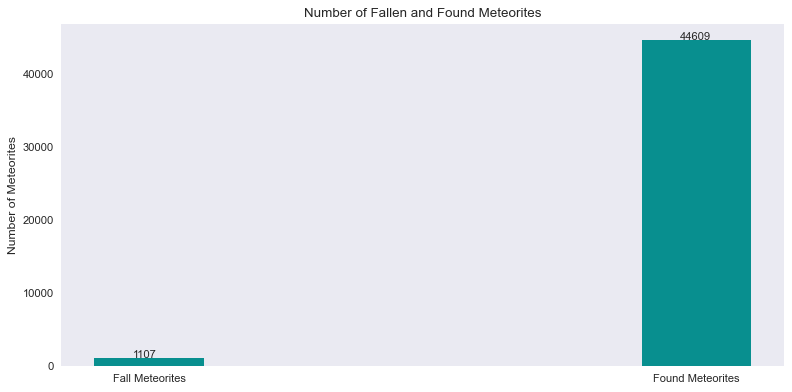

In [59]:
fall_data = data[['fall']] == 'Fell'

count_fall = int(fall_data.sum())
count_found = len(fall_data) - count_fall

#print(count_fall, count_found)

width = 0.2
x = ['Fall Meteorites', 'Found Meteorites']
y = [count_fall, count_found]
bars = plt.bar(x, y, width=width, color = '#088F8F')

for bar in bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + 0.07, y_val, y_val)


plt.ylabel('Number of Meteorites')
plt.title("Number of Fallen and Found Meteorites")
plt.tight_layout()
plt.grid(False)
plt.show()


### Analysis

The number of Found Meteorites far outnumber the number of Fall Meteorites. This is probably due to the fact that observing a falling meteorite is a far rarer occurence than finding one.

# Distribution of Mass

This is one of the most important information in the dataset. We plot the masses of meteorites that were under 1 kilogram since  a large majority of meteorites fell in this range.

We use a <b>KDE curve</b> to plot this data

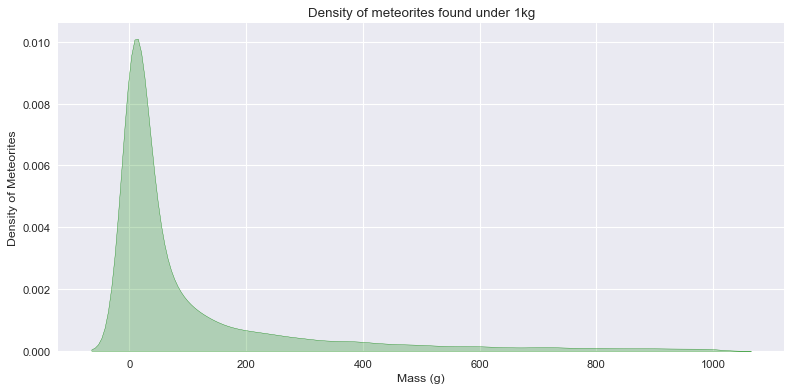

In [61]:
mass_data = data['mass (g)']
#print(mass_data)

mass_list = mass_data.tolist()
#print(mass_list)
mass_renewed = []

for mass in mass_list:
    if mass <= 1000:
        mass_renewed.append(mass)

sns.kdeplot(mass_renewed, shade=True, color='#008000')

plt.ylabel('Density of Meteorites')
plt.xlabel('Mass (g)')
plt.title('Density of meteorites found under 1kg')
plt.tight_layout()
plt.grid(True)
plt.show()

### Analysis

Interestingly enough, most of the meteorites are below 200 grams. The number of meteorites with masses greater than 200 grams falls off quickly.

This is because a meteorite falling from the sky gets burned in the atmosphere and it unable to retain its mass. The lighter meteorites are probably either completely burned up or do not get discovered. It is unclear why the heavier meteorites are not found in equal proportion

# Sample of the Heaviest Meteorites

The below list contains the names and information of all the meteorites heavier than 10,00 kilograms. 

In [64]:
greatest_mass = data[data['mass (g)'] > 10000000]  # greater than 10,000 kg
greatest_mass[['name', 'recclass', 'mass (g)', 'year']]

,name,recclass,mass (g),year
920,Sikhote-Alin,"Iron, IIAB",23000000.0,1947.0
3455,Armanty,"Iron, IIIE",28000000.0,1898.0
5016,Bacubirito,"Iron, ungrouped",22000000.0,1863.0
5365,Campo del Cielo,"Iron, IAB-MG",50000000.0,1575.0
5370,Canyon Diablo,"Iron, IAB-MG",30000000.0,1891.0
5373,Cape York,"Iron, IIIAB",58200000.0,1818.0
5468,Chupaderos,"Iron, IIIAB",24300000.0,1852.0
12613,Gibeon,"Iron, IVA",26000000.0,1836.0
16392,Hoba,"Iron, IVB",60000000.0,1920.0
22921,Mbosi,"Iron, ungrouped",16000000.0,1930.0


### Analysis

The heaviest meteorite was found in 1920, with a mass of 60,000 kilograms. There are two others that cross 50,000 kilograms but the rest are significantly lighter. It is interesting to note that these are approximately 10,000 times more massive than the majority of meteorites in the world.

The distribution by year seems spread out as expected. The composion of these meteorites are entirely dominated by Iron and its alloys. The strength, weight, and heat capacity of iron must make it an excellent material to survive the burn from the atmosphere and retain much of its weight.

# Distribution by Location

We plot the locations of all the meteorites by using <b> geographical plotting </b>

In [35]:
geo_data_original = data[data['GeoLocation'] != ' ']
geo_data = geo_data_original.dropna()
data_geo_original = geopandas.GeoDataFrame(geo_data_original, geometry = geopandas.points_from_xy(
    geo_data_original.reclong, geo_data_original.reclat))

In [36]:
data_geo_original

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,geometry
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",POINT (6.08333 50.77500)
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",POINT (10.23333 56.18333)
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",POINT (-113.00000 54.21667)
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",POINT (-99.90000 16.88333)
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",POINT (-64.95000 -33.16667)
...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)",POINT (17.01850 29.03700)
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)",POINT (8.96667 13.78333)
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)",POINT (17.66667 49.25000)
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)",POINT (41.50460 49.78917)


<AxesSubplot:>

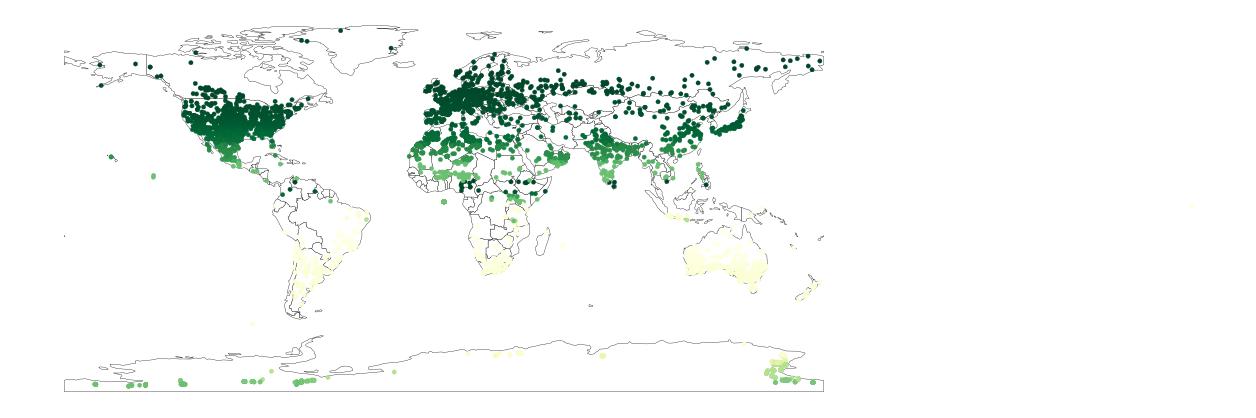

In [57]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize = (20,20))
ax.set_axis_off()

data_geo_original.plot(column='GeoLocation', cmap='YlGn',ax=ax, markersize = 15)

### Analysis

It seems that most of the meteorites were found in USA and Europe. A large number of them were found in Asia with varying densities, India having a signifant portion of findings. Antarctica also has a small number of disoveries.

It is interesting to note that a large number of meteorites fall in the ocean (a majority of Earth's surface is covered in oceans), but perhaps due to difficulty of discovering these meteorites in the ocean, there have only been sparing amounts found.

# Conclusion

To conclude, meteorite landings information has been an intriguing source of data to analyze. There is inherant bias in a number of these distributions:

- Most of the meteorites were found in more developed countries rather than devloping countries and oceans
- Meteorites are also found in Antarctica in larger numbers since they are preserved there by the ice
- Much of the data is from 1950 forwards, and data before 1900 is sparse and outdated

Other observations made are that falling and relict meteorites are sparse in this data. It is saturated with found and valid meteorites. Relict meteorite data in particular has very little information, but make up a significant portion of light meteorites.

The results of this data analysis was unexpected and informational. A deeper understanding of meteorites and greater technology is required to discover the meteorites that are more difficult to discover.